Solving the ten-class classification problem in the MNIST using feed-
forward neural network. You need to finetune your network and only present your best
result.

In [1]:
# coding: utf-8
# a simple MLP network
import time
import numpy as np
import scipy.io as spio
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


hidden_size = 100
output_size = 10
batch_size = 100
feature_size = 784
max_steps = 1000
beta = 0.1 # regularization

sess = tf.Session()

In [2]:
def load_data():
    mnist = tf.contrib.learn.datasets.load_dataset("mnist")
    train_data = mnist.train.images # Returns np.array
    train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
    eval_data = mnist.test.images # Returns np.array
    eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
    return train_data, eval_data, train_labels, eval_labels

In [3]:
def normalize(X, std=True):
    mean = X.mean(axis=0)
    var = X.std(axis=0)
    if std:
        X_norm = (X - mean) / var
    else:
        X_norm = X - mean
    return X_norm , mean, var

In [4]:
def visual_2D(X, y):
    pca = PCA(n_components=2)
    X_r = pca.fit(X).transform(X)
    
    # plot 
    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2
    target_names = ["-1", "0", "1"]
    for color, i, target_name in zip(colors, [-1, 0, 1], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of Input dataset')
    plt.show()

In [5]:
def lb2vec(y_in):
    y = y_in.ravel()
    a = y - y.min()
    b = np.zeros((a.size, a.max()+1))
    b[np.arange(a.size),a] = 1
    return b

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


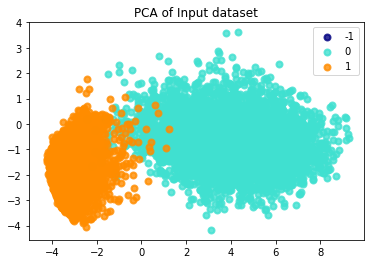

In [6]:
X_train, X_test, y_train_lb, y_test_lb = load_data()

# visualize original data in 2D
visual_2D(X_train,y_train_lb)

In [7]:
X_train, X_train_mean, X_train_var = normalize(X_train, std=False)
# X_test = normalize(X_test)
X_test = (X_test - X_train_mean)
# map y labels to one-hot format
y_train = lb2vec(y_train_lb)
y_test = lb2vec(y_test_lb)

In [8]:
# MLP model
def mlp_model(input_layer, hidden_size=hidden_size):
    W1 = tf.Variable(tf.random_normal([feature_size, hidden_size], mean=0.0, stddev=1.0))
    b1 = tf.Variable(tf.random_normal([1, hidden_size], mean=0.0, stddev=1.0))
    hidden_layer = tf.nn.relu(tf.matmul(input_layer, W1) + b1)
    W2 = tf.Variable(tf.random_normal([hidden_size, output_size], mean=0.0, stddev=1.0))
    b2 = tf.Variable(tf.random_normal([1, output_size], mean=0.0, stddev=1.0))
    output_layer = tf.matmul(hidden_layer, W2) + b2
    
    regularizer = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + tf.nn.l2_loss(b1) + tf.nn.l2_loss(b2)
    return output_layer, regularizer

# pipeline
input_layer = tf.placeholder(tf.float32, shape=(None, feature_size))
y_label = tf.placeholder(tf.float32, shape=(None, output_size))
output_layer, regularizer = mlp_model(input_layer)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=y_label)) + beta * regularizer

# opt = tf.train.AdadeltaOptimizer(0.1)
opt = tf.train.GradientDescentOptimizer(0.05)
train_step = opt.minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [9]:
# Accuracy
y_predict = tf.nn.softmax(output_layer)
correct_prediction = tf.equal(tf.argmax(y_predict, axis=1), tf.argmax(y_label, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
# Train, mini-batch processing
def train():
    loss_list = []
    train_acc_list = []
    test_acc_list = []
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(max_steps):
        rand_index = np.random.choice(len(X_train), size=batch_size)
        rand_x = X_train[rand_index]
        rand_y = y_train[rand_index]
        train_dict = {input_layer: rand_x, y_label: rand_y}
        test_dict = {input_layer: X_test, y_label: y_test}
        sess.run(train_step, feed_dict=train_dict)
        if (i+1)% 10 == 0:
            train_loss = sess.run(loss, feed_dict=train_dict)
            train_accuracy = sess.run(accuracy, feed_dict=train_dict)
            test_accuracy = sess.run(accuracy, feed_dict=test_dict)
            print('Step #' + str(i+1))
            print('Train loss = ' + str(train_loss))
            print('Accuracy(Train) = ' + str(train_accuracy))
            print('Accuracy(Test) = ' + str(test_accuracy))
            loss_list.append(train_loss)
            train_acc_list.append(train_accuracy)
            test_acc_list.append(test_accuracy)
            
    return loss_list, train_acc_list, test_acc_list
        
    

In [17]:
time_list = []

for iters in range(1):
    print iters
    start_time = time.time()
    loss_list, train_acc_list, test_acc_list = train()
    end_time = time.time()
    print "Training time: {}".format(end_time - start_time)
    time_list.append(end_time-start_time)

0
Step #10
Train loss = 3600.2656
Accuracy(Train) = 0.42
Accuracy(Test) = 0.3013
Step #20
Train loss = 3254.9065
Accuracy(Train) = 0.46
Accuracy(Test) = 0.4637
Step #30
Train loss = 2936.8171
Accuracy(Train) = 0.54
Accuracy(Test) = 0.5511
Step #40
Train loss = 2653.8977
Accuracy(Train) = 0.63
Accuracy(Test) = 0.598
Step #50
Train loss = 2399.0542
Accuracy(Train) = 0.68
Accuracy(Test) = 0.6449
Step #60
Train loss = 2168.305
Accuracy(Train) = 0.69
Accuracy(Test) = 0.6661
Step #70
Train loss = 1961.4133
Accuracy(Train) = 0.64
Accuracy(Test) = 0.6902
Step #80
Train loss = 1774.1646
Accuracy(Train) = 0.76
Accuracy(Test) = 0.7093
Step #90
Train loss = 1603.6047
Accuracy(Train) = 0.78
Accuracy(Test) = 0.7231
Step #100
Train loss = 1450.6749
Accuracy(Train) = 0.74
Accuracy(Test) = 0.739
Step #110
Train loss = 1312.6442
Accuracy(Train) = 0.75
Accuracy(Test) = 0.7473
Step #120
Train loss = 1186.4805
Accuracy(Train) = 0.74
Accuracy(Test) = 0.7575
Step #130
Train loss = 1072.8715
Accuracy(Train) =

In [18]:
print "Average accuracy on test set(hidden_size=100): ", sum(loss_list) / len(loss_list)

Average accuracy on test set(hidden_size=100):  376.3584116363525


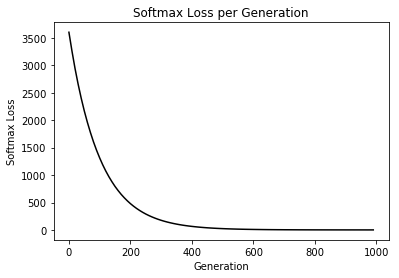

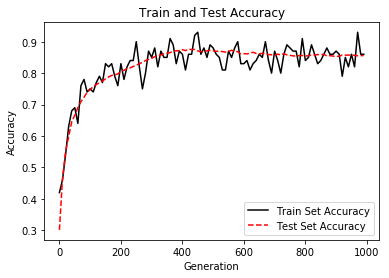

In [20]:
  # Matlotlib code to plot the loss and accuracies
eval_indices = range(0, 1000, 10)
  # Plot loss over time
plt.plot(eval_indices, loss_list, 'k-')
plt.title('Softmax Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Softmax Loss')
plt.savefig("loss.pdf")
plt.show()
# Plot train and test accuracy
plt.plot(eval_indices, train_acc_list, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc_list, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig("accuracy.pdf")
plt.show()